In [1]:
import pandas as pd

import numpy as np
import os

import matplotlib.pyplot as plt

import geopandas as gpd

In [2]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [212]:
geo_data_enter = gpd.read_file("../data/서울시 상권분석서비스(영역-상권)/서울시 상권분석서비스(영역-상권).shp")
geo_data_hdong = gpd.read_file("../data/서울시 상권분석서비스(영역-행정동)/서울시 상권분석서비스(영역-행정동).shp")

### 데이터 둘러보기

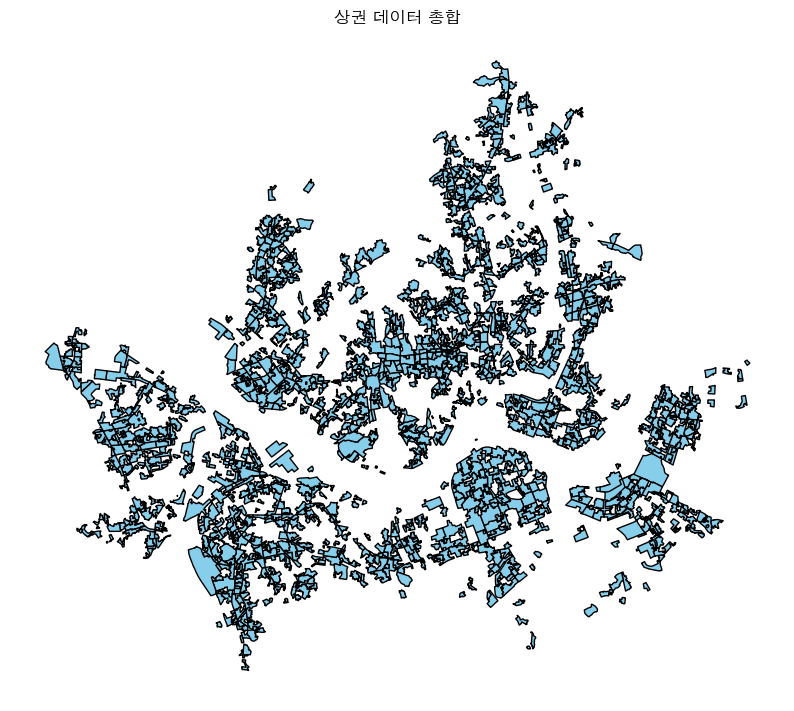

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 예시: GeoDataFrame의 처음 6개 데이터 선택
gdf_sample = geo_data_enter

# 한 화면에 6개 폴리곤을 표시
fig, ax = plt.subplots(figsize=(10, 10))
gdf_sample.plot(ax=ax, color="skyblue", edgecolor="black")

# 제목 및 기타 설정
ax.set_title("상권 데이터 총합")
ax.axis("off")

plt.show()


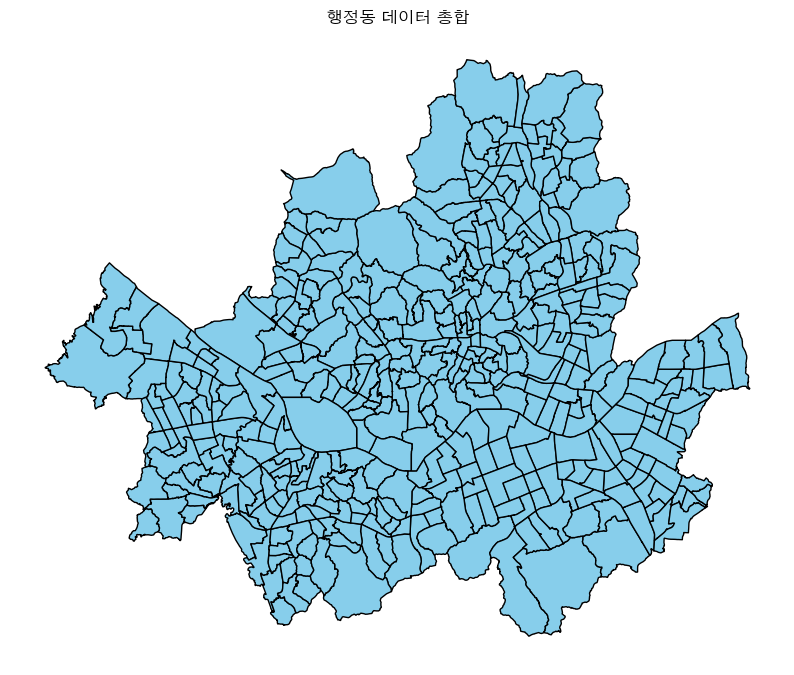

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 예시: GeoDataFrame의 처음 6개 데이터 선택
gdf_sample = geo_data_hdong

# 한 화면에 6개 폴리곤을 표시
fig, ax = plt.subplots(figsize=(10, 10))
gdf_sample.plot(ax=ax, color="skyblue", edgecolor="black")

# 제목 및 기타 설정
ax.set_title("행정동 데이터 총합")
ax.axis("off")

plt.show()


### 반경 200미터로 변경히가

In [6]:
gdf_sample.crs

<Projected CRS: PROJCS["Korea_2000_Korea_Central_Belt",GEOGCS["GCS ...>
Name: Korea_2000_Korea_Central_Belt
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Korean_Geodetic_Datum_2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
from shapely.geometry import Point
lat, lng =  37.5574771, 127.0020518

point = Point(lng, lat)

# GeoDataFrame 생성 및 위경도 좌표계(EPSG:4326) 설정
gdf_point = gpd.GeoDataFrame(geometry=[point], crs="EPSG:4326")

# 한국의 평면 좌표계 (예: EPSG:5191)로 변환
gdf_point = gdf_point.to_crs(epsg=5181)

# 200m 반경 버퍼 생성
gdf_point['buffer_200m'] = gdf_point.geometry.buffer(200)

# 다시 위경도 좌표계로 변환
# gdf_point = gdf_point.to_crs(epsg=4326)

# 결과 출력
print(gdf_point['buffer_200m'])

point_buffer =  gdf_point.iloc[:,[-1]]
point_buffer.columns = ['geometry']
point_buffer

0    POLYGON ((200381.292 450883.370, 200380.329 45...
Name: buffer_200m, dtype: geometry


,geometry
0,"POLYGON ((200381.292 450883.370, 200380.329 45..."


In [ ]:
seoul_train = pd.read_csv('../data/Seoul_train.csv').iloc[:, 1:]
seoul_train.head()

In [181]:
lat, lng =  37.5574771, 127.0020518

In [ ]:
geo_data_hdong = gpd.read_file("../data/서울시 상권분석서비스(영역-행정동)/서울시 상권분석서비스(영역-행정동).shp")

In [183]:
earns = pd.read_csv("../data/reduced_target.csv")
earns.head()



,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,월별_점포당_매출,월별_60대_매출,월별_나이총합_매출
0,20191,11110515,청운효자동,CS100001,한식음식점,2.338649e+07,1.917026e+06,1.756941e+07
1,20191,11110515,청운효자동,CS100002,중식음식점,9.185672e+06,7.964268e+05,7.487386e+06
2,20191,11110515,청운효자동,CS100003,일식음식점,1.044775e+07,7.260458e+05,1.010862e+07
3,20191,11110515,청운효자동,CS100004,양식음식점,2.767474e+07,1.051545e+06,2.232134e+07
4,20191,11110515,청운효자동,CS100005,제과점,3.899987e+07,2.493484e+06,3.860837e+07


In [213]:
earns_comercial = pd.read_csv('../data/comercial_reduced_target.csv')
earns_comercial.head()

,기준_년분기_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드_명,월별_점포당_매출
0,20191,발달상권,3120037,동대문역사문화공원역,네일숍,4.078658e+06
1,20191,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,네일숍,3.047821e+06
2,20191,골목상권,3110085,경리단길남측,네일숍,1.000000e+06
3,20191,골목상권,3110166,구의1동주민센터,네일숍,2.814599e+06
4,20191,골목상권,3110161,중곡역 3번,네일숍,6.918997e+06


In [174]:
def point_buffer_func(lng, lat, radios = 500):
    point = Point(lng, lat)

    # GeoDataFrame 생성 및 위경도 좌표계(EPSG:4326) 설정
    gdf_point = gpd.GeoDataFrame(geometry=[point], crs="EPSG:4326")

    # 한국의 평면 좌표계 (예: EPSG:5191)로 변환
    gdf_point = gdf_point.to_crs(epsg=5181)

    # 200m 반경 버퍼 생성
    gdf_point['buffer_200m'] = gdf_point.geometry.buffer(radios)
    point_buffer =  gdf_point.iloc[:,[-1]]
    point_buffer.columns = ['geometry']
    return point_buffer

In [260]:

def ratio_earned_func(earns, geo_data, lng, lat, wanted_column = '월별_점포당_매출'):

    point_buffer = point_buffer_func(lng, lat)

    def point_ratio_func():
        geo_data_converted = geo_data.to_crs(epsg=5181)
        gdf_intersection = gpd.overlay(geo_data_converted, point_buffer, how='intersection')


        gdf_intersection['ratio'] = gdf_intersection.geometry.area / point_buffer.geometry.area.item()
        point_ratio = pd.DataFrame(gdf_intersection.iloc[:, [1, -1]], )
        point_ratio.set_index(point_ratio.columns[0], inplace=True)
        return point_ratio
    
    point_ratio = point_ratio_func()

    # return(point_ratio)

    convs = earns[earns['서비스_업종_코드_명'] == '편의점']
    connvs_hdong = convs.pivot_table(index = '행정동_코드_명', values =wanted_column, aggfunc='mean')
    ratio_earned = (connvs_hdong.loc[list(point_ratio.index), '월별_점포당_매출'] * point_ratio.iloc[:, 0]).sum()



    # return  point_buffer
    return ratio_earned


def train_each_func(seoul_train, lng, lat):

    point_buffer = point_buffer_func(lng, lat)

    point_list = [Point(lng, lat) for lng, lat in zip(seoul_train.iloc[:, -1], seoul_train.iloc[:, -2])]

    station_points = gpd.GeoDataFrame(geometry=point_list, crs="EPSG:4326").to_crs(epsg=5181)
    station_points['역명'] = seoul_train.iloc[:, 0]



    # return  point_buffer
    return station_points[point_buffer.iloc[0, 0].contains(station_points.iloc[:, 0])]



In [261]:
ratio_earned_func(earns, geo_data_hdong, lng, lat)

88229420.93845755

In [262]:
cu_latlng =  pd.read_csv("../data/cu_latlng.csv")
cu_latlng

,주소,lat,lng
0,서울특별시 강남구 삼성동 141-10번지,37.505811,127.050232
1,서울특별시 강남구 도산대로 529 KRA프라자 (청담동) KRA프라자,37.525091,127.051312
2,서울특별시 강남구 논현로 201 (도곡동),37.485902,127.040905
3,서울특별시 강남구 논현로151길 52 (신사동),37.519684,127.023930
4,서울특별시 강남구 봉은사로 439 CC빌딩 (삼성동) CC빌딩,37.511736,127.047848
...,...,...,...
2656,서울특별시 중랑구 봉화산로 81 피카소의꿈미술학원,37.601955,127.083407
2657,"서울특별시 중랑구 동일로126길 43, (중화동)",37.598858,127.082598
2658,"서울특별시 중랑구 중랑역로13길 2, (중화동) 1층",37.596886,127.075369
2659,"서울특별시 중랑구 동일로123길 25, (중화동)",37.597543,127.078598


In [269]:
store_money_list = []
for lat, lng in zip(cu_latlng['lat'], cu_latlng['lng']):
    try:
        store_money_list.append(ratio_earned_func(earns, geo_data_hdong, lng, lat))
    except Exception as e:
        store_money_list.append(np.nan)

<Axes: >

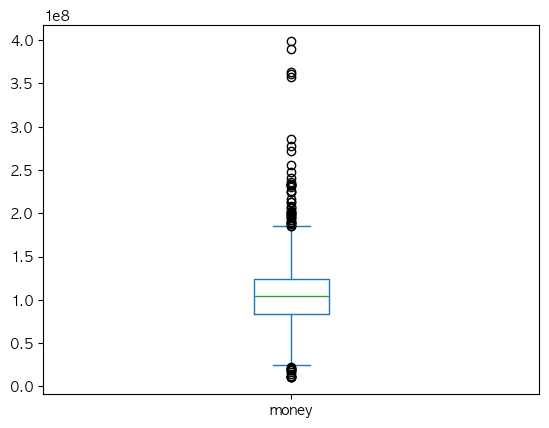

In [272]:
cu_latlng['money'] =  store_money_list
cu_latlng['money'].plot(
    kind='box'
)

### test

In [177]:
train_each_func(seoul_train, lng, lat).shape[0]

1

In [246]:
connvs_hdong, point_ratio = ratio_earned_func(earns_comercial, geo_data_enter, lng, lat, commecial=True)

In [247]:
connvs_hdong

,월별_점포당_매출
상권_코드,
3001491,3.088870e+09
3001492,1.650622e+09
3001493,1.209856e+09
3001494,1.053101e+09
3001495,4.711689e+09
...,...
3130285,1.418615e+09
3130290,4.905819e+08
3130311,3.556093e+08


In [248]:
point_ratio

,ratio
TRDAR_CD,
3120036,0.084376
3120032,0.026317
3110048,0.002707
3110047,0.027120
3110045,0.003817
3110044,0.027943
3110043,0.106342
3110042,0.011560


In [249]:
test = connvs_hdong.index 

In [259]:
#3120036
pd.Series(test.sort_values(ascending=False)).iloc[325:350]

325    3110168
326    3110165
327    3110159
328    3110157
329    3110154
330    3110151
331    3110150
332    3110141
333    3110139
334    3110134
335    3110132
336    3110131
337    3110124
338    3110122
339    3110085
340    3110081
341    3110080
342    3110069
343    3110068
344    3110066
345    3110059
346    3110058
347    3110056
348    3110052
349    3110020
Name: 상권_코드, dtype: int64

### metro

In [108]:
point_list = [Point(lng, lat) for lng, lat in zip(seoul_train.iloc[:, -1], seoul_train.iloc[:, -2])]

In [122]:
station_points = gpd.GeoDataFrame(geometry=point_list, crs="EPSG:4326").to_crs(epsg=5181)
station_points['역명'] = seoul_train.iloc[:, 0]

In [ ]:
station_points[point_buffer.iloc[0, 0].contains(station_points.iloc[:, 0])]

,geometry,역명
159,POINT (200494.969 451058.178),동대입구


### graph

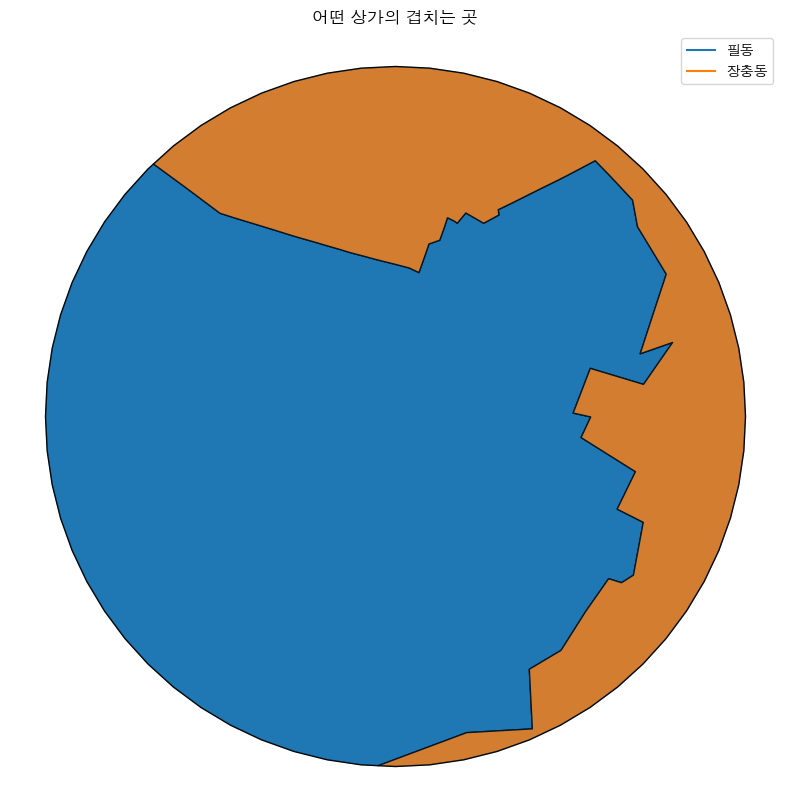

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 예시: GeoDataFrame의 처음 6개 데이터 선택
gdf_sample = gdf_intersection

# 임의의 색상 리스트 생성 (또는 colormap 사용 가능)
colors = list(mcolors.TABLEAU_COLORS.values())

# 한 화면에 6개 폴리곤을 각각 다른 색으로 표시
fig, ax = plt.subplots(figsize=(10, 10))

names = []
legned_colors = []
handles = []

for i, (idx, row) in enumerate(gdf_sample.iterrows()):
    # 단일 행 GeoDataFrame 생성
    single_gdf = gpd.GeoDataFrame([row], geometry='geometry')
    color = colors[i % len(colors)]
    name = row.ADSTRD_NM
    legned_colors.append(color)
    # 색상 적용 (색상 리스트에서 순서대로 선택)
    handle, = plt.plot([], [], color=color, label=name)
    handles.append(handle)

    single_gdf.plot(ax=ax, color=colors[i % len(colors)], edgecolor="black")

point_buffer.plot(ax=ax, edgecolor="black", alpha = 0.2)

# 제목 및 기타 설정
ax.set_title("어떤 상가의 겹치는 곳")
ax.axis("off")



plt.legend(handles=handles)

plt.show()
